# Исследование объявлений о продаже квартир
В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Задачи, цели проекта
 - Выполнить предобработку данных;
 - расширить таблицу добавлением нужных для анализа параметров;
 - провести анализ данных: 
        - изучить параметры данных;
        - посчитать нужные статистические характеристики;
        - убрать выбросы;
        - выяснить какие параметры влияют на цену квартиры и как;
        - проиллюстрировать свои выводы;
        - ответить на поставленные заказщиком вопросы.

##  Изучение общей информации

In [62]:
import pandas as pd #loading the necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('real_estate_data.csv', sep = '\t') #read the file with separator \t
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


In [63]:
columns = data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Мы имеем данные с таблицей, состоящей из 22 столбцов.
**Описание данных**
- `total_images` — число фотографий квартиры в объявлении.
- `last_price` — цена на момент снятия с публикации. 
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `first_day_exposition` — дата публикации
- `rooms` — число комнат
- `ceiling_height` — высота потолков (м)
- `floors_total` — всего этажей в доме
- `living_area` — жилая площадь в квадратных метрах (м²)
- `floor` — этаж
- `is_apartment` — апартаменты (булев тип)
- `studio` — квартира-студия (булев тип)
- `open_plan` — свободная планировка (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `balcony` — число балконов
- `locality_name` — название населённого пункта
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)

В датафрейме 22 столбца и 23699 строк.

Названия столбцов не содержат пробелов, все знаки в одном регистре и на одном языке.

Есть категориальные и количественные данные, также присутствуют данные булева типа.

Есть пропуски во многих столбцах таблицы, о них подробнее ниже.

Типы столбцов соответствуют информации хранящихся в них. 

Данные в столбце `first_day_exposition` имееют тип object, необходимо перевести в datetime.

Некоторые данные имеют тип float, хотя представляют собой целые числа (`floors_total`, `balcony`, `parks_around3000`, `ponds_arround3000`, `days_exposition`).


## 2. Предобработка данных

### Замена пропущенных значений и артефактов.

Часто предоставленные данные имеют пропуски, возникшие по тем или иным причинам, что влечёт за собой снижение эффективности применения статистических моделей. А также могут присутствовать артефакты(невозможные значения), которые в неисправленом виде могут построить неверную модель и привести к ошибкам. Проверим, есть ли такие в наших данных. 

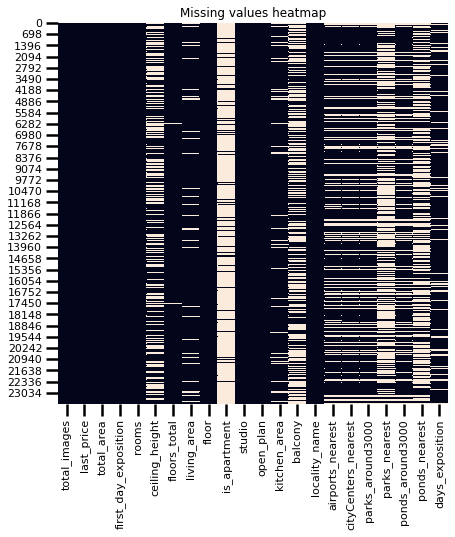

In [64]:
fig = plt.subplots(figsize=(7,7))  #visualize nan-values by heatmap 
sns.heatmap(data.isna(), cbar = False).set_title("Missing values heatmap")
plt.show()

#### Столбцы `living_area` и `kitchen_area`

Столбцы содержат пропущенные значения. Вероятнее всего пользователь не заполняет эти данные так как эта информация нуждается в уточнении, не все знают какие по размеру у них кухня и жилая площадь. Заполним эти данные следующим образом:
- посчитаем какую долю в среднем составляет площадь кухни от всей площади квартиры в зависимости от количества комнат в квартире
- высчитаем эту долю от общей площади
- посчитаем среднюю жилую площадь в зависимости от количества комнат в квартире.

Для начала посмотрим, действительно ли есть зависимость доли площади кухни от количества комнат в квартире и жилой площади от количества комнат. Для этого категоризируем данные столбца `rooms`: квартиры с количеством комнат больше 6 объединим в одну категорию.

In [65]:
data['rooms_cat'] = data.rooms.apply(lambda x: 'больше 6' if x>6 else str(x)+'-комнатные') #categorized number of rooms
data.rooms_cat.value_counts()

1-комнатные    8047
2-комнатные    7940
3-комнатные    5814
4-комнатные    1180
5-комнатные     326
0-комнатные     197
6-комнатные     105
больше 6         90
Name: rooms_cat, dtype: int64

Посчитаем долю площади кухни для имеющихся данных и посчитаем среднее для каждой из групп.

Посчитаем среднюю жилую площадь для каждой из групп.

,living_area_average,kitchen_perc_average
rooms_cat,,
0-комнатные,18.87,nan
1-комнатные,17.89,0.25
2-комнатные,31.74,0.17
3-комнатные,47.39,0.14
4-комнатные,66.98,0.12
5-комнатные,100.01,0.11
6-комнатные,130.98,0.10
больше 6,174.01,0.09


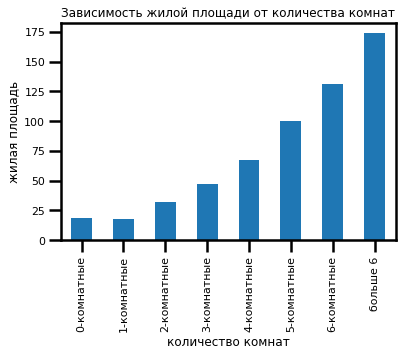

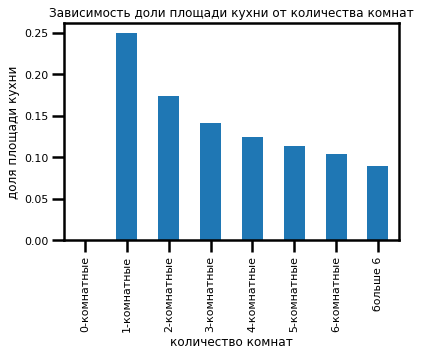

In [66]:
data['kitchen'] = data.kitchen_area/data.total_area # calculate percentage of kitchen area for unnan value
table1 = data.pivot_table(values = 'kitchen', index=['rooms_cat'], aggfunc='mean') #make pivot table with average value of percentage of kitchen area
table2 = data.pivot_table(values = 'living_area', index=['rooms_cat'], aggfunc='mean') #make pivot table with average value of living area
table1.columns = ['kitchen_perc_average']
table2.columns = ['living_area_average']
table_all = table2.join(table1)
display(table_all)
table_all.living_area_average.plot(kind = 'bar', title = 'Зависимость жилой площади от количества комнат', xlabel = 'количество комнат', ylabel = 'жилая площадь')
plt.show()
table_all.kitchen_perc_average.plot(kind = 'bar', title = 'Зависимость доли площади кухни от количества комнат', xlabel = 'количество комнат', ylabel = 'доля площади кухни')
plt.show()

Мы видим, что чем больше комнат в квартире, тем меньше доля площади кухни. Для квартир студий нет значения площади кухни. 

Для жилой площади видим зависимость, чем больше комнат, тем больше жилая площадь. Исключение квартиры студии, но это понятно, ведь там нет значения площади кухни.

In [67]:
data = data.join(table_all, on = 'rooms_cat')
data['kitchen_area'] = data.apply(lambda x: x.kitchen_perc_average*x.total_area if pd.isna(x.kitchen_area) else x.kitchen_area, axis = 1) #fill nan-values
data['living_area'] = data.apply(lambda x: x.living_area_average if pd.isna(x.living_area) else x.living_area, axis = 1)

In [68]:
data[pd.isna(data.kitchen_area)].rooms.unique() # check number of rooms in rows with nan-values in kitchen_area

array([0], dtype=int64)

Проверили, что для площади кухни остались только пропущенные значения для квартир студий. Заменяем эти значения на 0.

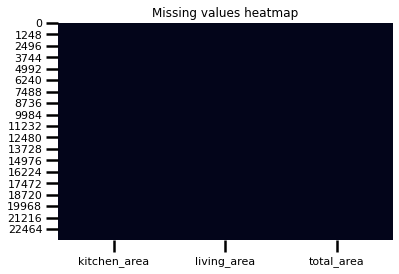

In [69]:
data['kitchen_area'] = data.kitchen_area.fillna(0)
data[['kitchen_area','living_area','total_area']].isna().sum()
sns.heatmap(data[['kitchen_area','living_area','total_area']].isna(), cbar = False).set_title("Missing values heatmap")
plt.show()

В данных столбцах пропущенных хначений нет.

#### Столбецы `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`, `parks_nearest`, `ponds_nearest`

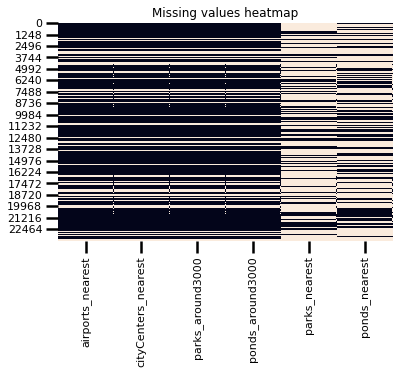

In [70]:
sns.heatmap(data[['airports_nearest','cityCenters_nearest','parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']].isna(), 
            cbar = False).set_title("Missing values heatmap")
plt.show()

По этим столбцам видим очень много пропусков. Пропуски по столбцам  'airports_nearest','cityCenters_nearest','parks_around3000', 'ponds_around3000' совпадают для строк. Скорее всего продавцом не была указана точка местоположения квартиры, поэтому система не высчитывает эти параметры.

В столбцах`parks_nearest`, `ponds_nearest` - еще больше пропусков. Дело в том, что если система высчитала, что в пределах 3 км нет парков ('parks_around' = 0), то значение 'parks_nearest' = NaN. Аналогично и для прудов. Заменим эти NaN значения на строки 'no parks', 'no ponds'.

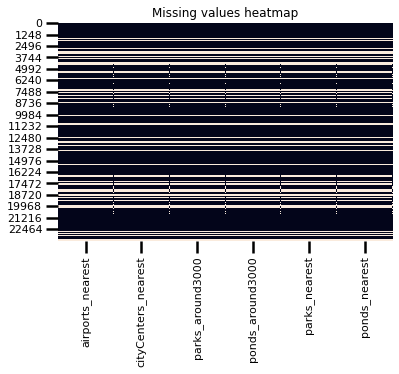

In [71]:
data['parks_nearest'] = data.apply(lambda row: 'no parks' if row.parks_around3000 == 0 else row.parks_nearest, axis = 1)
data['ponds_nearest'] = data.apply(lambda row: 'no ponds' if row.ponds_around3000 == 0 else row.ponds_nearest, axis = 1)
sns.heatmap(data[['airports_nearest','cityCenters_nearest','parks_around3000', 'ponds_around3000', 'parks_nearest', 'ponds_nearest']].isna(), 
            cbar = False).set_title("Missing values heatmap")
plt.show()

Теперь видно, что для этих столбцов пропущенные значения в одних и тех же строках. Что подтверждает гипотезу о том, что продавцом не указана точка местоположения квартиры.
Поэтому, предлагаю здесь не трогать пропуски.

#### Столбец `ceiling_height`

In [72]:
data.ceiling_height.unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Взглянув на уникальные значения, видим, что некоторые значения нереально большие, например 32. или 24. Скорее всего в этих данных неправильно была поставлена точка. 

Передвинем ее делением на 10 только для значений высоты потолка >=24(иначе получится потолок несоответствующий нормам). 

Посчитаем оставшиеся неправдоподобные значения(потолок >11 метров) и если из немного - удалим.

In [73]:
data['ceiling_height'] = data.ceiling_height.apply(lambda x: x if x<24 else x/10)
print(f'Неправдоподобных данных осталось {data.query("ceiling_height>11").ceiling_height.count()} шт.')
data.drop(index = data.query("ceiling_height>11").index, inplace = True)
data.ceiling_height.unique()

Неправдоподобных данных осталось 3 шт.


array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

Теперь артефактов в этом столбце нет, но есть пропущенные значения. 

Очень важный столбец и так много пропущенных значений (38.8%). 

Сделаем предположение, что высота потолков зависит от локации объекта. Судя по архитектуре Санкт-Петербурга в центре должны быть квартиры с более высокими потолками. 

Для этого категоризируем столбец `cityCenters_nearest`. 

Посмотрим на каком значении `cityCenters_nearest`  начинается область.

In [74]:
data[(data.locality_name !='Санкт-Петербург') & (pd.notna(data.locality_name))].cityCenters_nearest.min() 

17012.0

Итак, при значении `cityCenters_nearest` 17 км начинается область. Сделаем следующее разделение:
- 0-3км - это самый центр Петербурга
- 3-6 км - центр
- 6-17 км - остальной Петербург
- больше 17 км - область

In [75]:
def categorize_citycenters_nearest(income): #function for categorizing `cityCenters_nearest`
    if income<=3000:
        return 'до 3 км'
    elif income<=6000:
        return 'до 6 км'
    elif income<=17000:
        return 'до 17 км'
    elif pd.isna(income):
        return np.nan
    else:
        return 'больше 17 км'
    
data['citycenters_nearest_cat'] = data['cityCenters_nearest'].apply(categorize_citycenters_nearest)
data = data.astype({'citycenters_nearest_cat' : pd.CategoricalDtype(['до 3 км', 'до 6 км', 'до 17 км', 'больше 17 км'], ordered = True)})


Теперь сгрупируем по выделенным категориям и найдем среднюю высоту потолка для каждой категории.

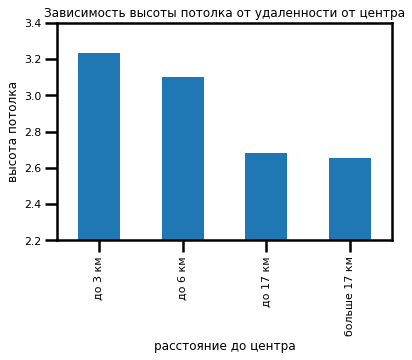

In [76]:
data.groupby('citycenters_nearest_cat').ceiling_height.mean().sort_values(ascending = False).plot(kind = 'bar', 
                                                                                                  title = 'Зависимость высоты потолка от удаленности от центра',
                                                                                                 xlabel= 'расстояние до центра', ylabel = 'высота потолка', ylim = (2.2, 3.4))
plt.show()

Наша гипотеза подтвердилась, чем дальше квартира от центра, тем потолок ниже.

Заполним пропуски в столбце средним значением по каждой выделенной группе.

In [77]:
table_ceil = data.pivot_table(values = 'ceiling_height', index=['citycenters_nearest_cat'], aggfunc='mean') #make pivot table with mean value

def fill_nan_values(row): 
    if pd.isna(row.ceiling_height) and pd.notna(row.citycenters_nearest_cat):
        return table_ceil.loc[row.citycenters_nearest_cat].ceiling_height
    else:
        return row.ceiling_height

data['ceiling_height'] = data.apply(fill_nan_values, axis = 1) #fill nan-values
print(f'Пропущенных значений в столбце `ceiling_height` осталось: {round(data.ceiling_height.isna().mean()*100)}%')

Пропущенных значений в столбце `ceiling_height` осталось: 11%


#### Столбец `is_apartament`

Самое большое количество пропущенных значений (88%). Предположительно, владельцы квартир не знают, чем отличаются квартиры от апартаментов, только владельцы апартаментов разбираются в этом вопросе. Поэтому так много пропусков.

Справка: Главное отличие апартаментов от квартир — это правовой статус. Юридически апартаменты относятся к нежилой недвижимости,


In [78]:
display(data.is_apartment.value_counts()) 
data.is_apartment.value_counts().loc[1]*100/len(data.is_apartment) #count percentage of apartments if nan-values fill with False

False    2725
True       50
Name: is_apartment, dtype: int64

0.2110060769750169

Если следовать этой логике и заполнить пропуски значением False (все кто не заполнил, владельцы квартир, не знающие о правовом статусе апартаментов), то получим только 0.2% всех квартир на данном рынке - апартаменты. Неправдоподобно. Поэтому оставим столбец как он есть.

#### Столбец `balcony`

В столбце количесва балконов около 50% пропущенных значений. Скорее всего пользователи не вводили это значение, потому что у них нет балкона. Поэтому заменим все пропущенные значения на ноль. А затем поменяем тип данных на integer.

In [79]:
data['balcony'] = data.balcony.fillna(0).astype('int') #replace the missing value with zero and change the type
data.balcony.value_counts()

0    15277
1     4194
2     3658
5      303
4      183
3       81
Name: balcony, dtype: int64

#### Столбец `locality_name`

In [80]:
data.locality_name.value_counts()

Санкт-Петербург                        15718
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               398
Пушкин                                   369
                                       ...  
деревня Котлы                              1
деревня Реброво                            1
поселок городского типа Кондратьево        1
поселок Коробицыно                         1
деревня Пижма                              1
Name: locality_name, Length: 364, dtype: int64

Пропущенные значения в этом столбце частично можно заполнить по данным в столбце `cityCenters_nearest`. Если данные в нем меньше 17 км, заполняем на "Санкт-Петербург"

In [81]:
data['locality_name'] = data.apply(lambda x: 'Санкт-Петербург' if x.cityCenters_nearest<=17000 else x.locality_name, axis = 1)
data.locality_name.isna().sum()

20

Осталось 20 пропущенных значений. 

#### Столбец `days_exposition`

Пропущенных значений: 3180


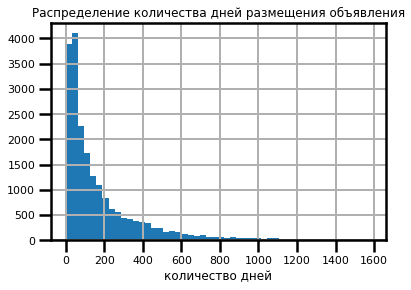

In [82]:
print(f'Пропущенных значений: {data.days_exposition.isna().sum()}') #nan-values
data.days_exposition.hist(bins = 50)
plt.title('Распределение количества дней размещения объявления')
plt.xlabel('количество дней')
plt.show()

Пропущенные значения могли возникнуть в результате не закрытия объявления о продаже (продажа была совершена, но не была закрыта на сайте объявлений).
В этом случае, считаю невозможным делать какую-либо замену для избавления от пропущенных данных.

#### Столбец `floors_total`

Есть предположение, что этажность здания тоже зависит от местололожения дома. Судя по архитектуре Петербурга, в центре преобладают малоэтажные здания. По мере удаления от центра этажность возрастает, хотя в области может снизится. Проверим.

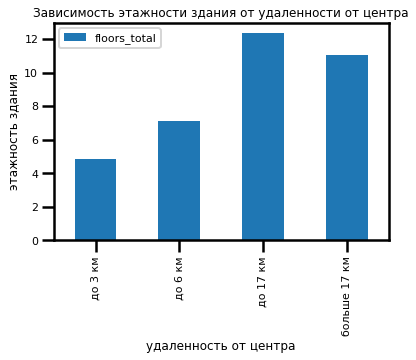

In [83]:
table_floors = data.pivot_table(values = 'floors_total', index=['citycenters_nearest_cat'], aggfunc='mean') #make pivot table with mean value
table_floors.plot(kind = 'bar', title = 'Зависимость этажности здания от удаленности от центра', xlabel = 'удаленность от центра', ylabel = 'этажность здания')
plt.show()

Гипотеза наша подтвердилась. Теперь заполним пропущенные значения в столбце `floors_total` на среднее значение по каждой категории и проверим сколько пропущенных значений осталосью

In [84]:
def fill_nan_values2(row): 
    if pd.isna(row.floors_total) and pd.notna(row.citycenters_nearest_cat):
        return max(table_floors.loc[row.citycenters_nearest_cat].floors_total, row.floor)
    else:
        return row.floors_total

data['floors_total'] = data.apply(fill_nan_values2, axis = 1) #fill nan-values
print(f'Пропущенных значений в столбце `floors_total` осталось: {data.floors_total.isna().sum()} штук')

Пропущенных значений в столбце `floors_total` осталось: 10 штук


Посмотрим в общем как изменилось количество пропущенных значений после наших преобразований.

In [85]:
data = data[list(columns)+['rooms_cat']+['citycenters_nearest_cat']]
nan_data_after = data.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].reset_index() #create frame with number of nan-values for each column
nan_data_after['nans%'] = nan_data_after['nans'].apply(lambda x: round(x*100/len(data),2)) #add column with % of nan-values
nan_change = nan_data.merge(nan_data_after, on = 'index', suffixes = ('_before', '_after'), how = 'left')
nan_change

NameError: name 'nan_data' is not defined

Итак, мы закончили работу с пропусками в данных. Что было сделано.
- `ceiling_height`: заполнили пропуски средним значением по группам удаленности от центра. Процент пропущенных значений снизился с 38.8% до 10.9%
- `floors_total`: заполнили пропуски средним значением по группам удаленности от центра. Осталось только 10 пропущенных значений.
- `is_apartment`: без изменений
- `locality_name`: заполнили часть пропусков, исходя из данных 	`cityCenters_nearest`. Осталось 20 пропущенных значений.
- `parks_nearest`, `ponds_nearest`: часть пропущенных значений были заменены на значения 'no parks','no ponds' основываясь на значениях `parks_around3000`,,`ponds_around3000`
- `airports_nearest`,`cityCenters_nearest`,`parks_around3000`,`ponds_around3000`, `parks_nearest`, `ponds_nearest`: после предыдущей замены пропуски в одних и тех же строках. Не трогаем.
- `days_exposition`: без изменений.
- `living_area`: заполнили средним значением в группе с одинаковым количеством комнат.
- `kitchen_area`: заполнили посчитав среднюю долю площади кухни от общей площади в зависимости от количества комнат.
- `balcony`: NaN values заменили на 0

### Изменение типов данных

In [ ]:
data.info()

Изменим формат столбца `first_day_exposition` на datetime. Это необходимо, чтобы использовать эти данные для дальнейшего анализа.

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Выше в работе был изменен тип для столбца `balcony` на int32.

Поскольку в столбцах `floors_total`, `parks_around3000`, `ponds_around3000`, `days_exposition` остались значения NaN, то int никак не получится - NaN есть только во float

##  Добавление данных в таблицу

Для дальнейшего анализа нам нужны следующие данные:
- цена квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры (варианты — первый, последний, другой);
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [ ]:
data['price_m2'] = (data.last_price/data.total_area).astype('int') #calculate the price per square meter

name_month = ['Январь', 'Февраль', 'Март', 'Апрель','Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
name_day = ['понедельник', 'вторник', 'среда', 'четверг','пятница', 'суббота', 'воскресенье']
data['year'] = pd.DatetimeIndex(data.first_day_exposition).year #get year from datetime
data['month_num'] = pd.DatetimeIndex(data.first_day_exposition).month #get month number from datetime
dict_month = {key:value for key, value in zip(range(1,13),name_month)}
data['month'] = data.month_num.map(dict_month) #get month name
data['day_week_num'] = data.first_day_exposition.apply(lambda x: x.weekday()) #get weekday number from datetime
dict_day_week = {key:value for key, value in zip(range(0,7),name_day)}
data['day_week'] = data.day_week_num.map(dict_day_week) #get weekday name

data['floor_cat'] = np.where(data.floor == 1, 'первый', 'другой') #categorize floor
data['floor_cat'] = np.where(data.floor == data.floors_total, 'последний', data['floor_cat'])

data['living_area_to_total'] = data.living_area/data.total_area # percentage of living area
data['kitchen_area_to_total'] = data.kitchen_area/data.total_area #percentage of kitchen area

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
data = data.astype({'day_week' : pd.CategoricalDtype(name_day, ordered = True), 'month' : pd.CategoricalDtype(name_month, ordered = True)})
data[['last_price', 'total_area', 'price_m2', 
      'first_day_exposition', 'year', 'month_num', 'month', 'day_week_num', 'day_week', 
      'floor_cat', 'living_area', 'kitchen_area',
      'living_area_to_total','kitchen_area_to_total']]


Все нужные данные посчитаны, перейдем к исследовательскому анализу данных.

##  Исследовательский анализ данных

### Задача 1,2,3
Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [ ]:
data['last_price'] = data.last_price/1000000
data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe()


Данные вполне правдоподобны, ограмные максимальные значения(по сравнению со средним) говорят о наличии выбросов.

Выбросы:
- влияют на общую стандартную вариацию данных.
- сдвигают общее среднее значение данных.
- преобразует данные в перекошенную форму.

Поэтому необходимо обнаружить выбросы и избавится от них.

Мы будем использовать Boxplots для обнаружения и визуализации выбросов, присутствующих в наборе данных.

Для столбца анализа по количеству комнат, будем использовать категориальную переменную, определенную выше в работе `rooms_cat`.

`last_price` переведено в млн.рублей

In [ ]:
data.rooms_cat.value_counts()
sns.set_context('poster',font_scale=0.5)
plt.figure(figsize = (9,9))
plt.pie(data.rooms_cat.value_counts(), autopct = '%d.2%%', pctdistance = 0.9, labels = data.rooms_cat.unique(),radius=1.2,startangle=0)
plt.title('Распределение по количеству комнат')
plt.show()

2/3 квартир имеют 1комнату или 3 комнаты, чуть меньший процент имеют 2 комнаты и небольшое количество - 4. Есть и квартиры, имеющие больше комнат, но их процент сильно ниже также как и квартир студий.

In [ ]:
list_columns1 = ['total_area', 'last_price', 'ceiling_height', 'days_exposition']
plt.figure(figsize = (15,4))
for i in range(len(list_columns1)):
    plt.subplot(1,4,i+1)
    sns.boxplot(data[list_columns1[i]])
plt.tight_layout()

Дейтвительно, много выбросов. Заменим выбросы на Nan values, и проверим построив boxplots.

In [90]:
def no_outliers(df, column): # remove outliers from data
    q25 = np.quantile(df.loc[:,column],0.25)
    q75 = np.quantile(df.loc[:,column],0.75)
    intr_qr = q75-q25
    maximum = q75+(1.5*intr_qr)
    minimum = q25-(1.5*intr_qr)
    df.loc[df[column] < minimum, column] = np.nan
    df.loc[df[column] > maximum, column] = np.nan
    return (df, q25, q75)

0       2.70
1       2.66
2       2.68
3       2.68
4       3.03
        ... 
23694   3.70
23695    nan
23696    nan
23697   3.00
23698   2.50
Name: ceiling_height, Length: 23696, dtype: float64
nan nan


<AxesSubplot:xlabel='ceiling_height'>

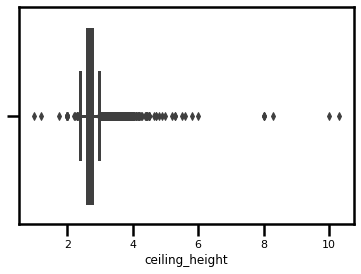

In [93]:
print(data.ceiling_height)
print(no_outliers(data,'ceiling_height')[1], no_outliers(data,'ceiling_height')[2])
sns.boxplot(no_outliers(data,'ceiling_height')[0]['ceiling_height'])

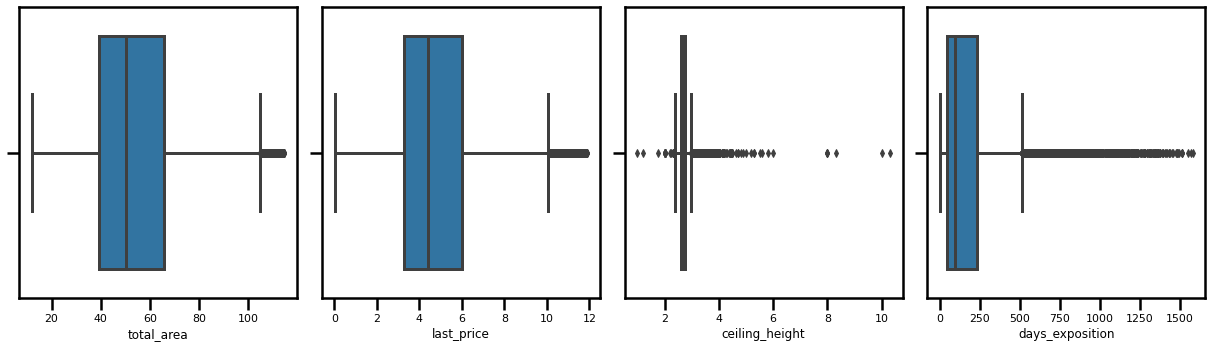

In [58]:
plt.figure(figsize = (17,5))
for i in range(len(list_columns1)):
    plt.subplot(1,4,i+1)
    sns.boxplot(no_outliers(data,list_columns1[i])[list_columns1[i]])
plt.tight_layout()

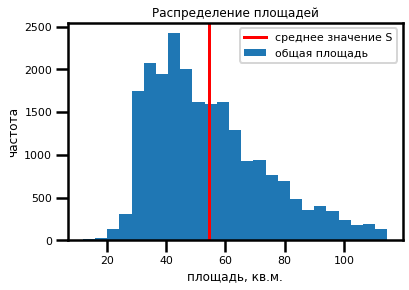

In [59]:
data.total_area.plot(kind = 'hist', bins =25, title = 'Распределение площадей', label = 'общая площадь')
plt.axvline(data.total_area.mean(), color = 'r', label = 'среднее значение S')
plt.legend()
plt.xlabel('площадь, кв.м.')
plt.ylabel('частота')
plt.show()

Большая часть квартир имеет метраж от 30 до 80 кв.м., больше всего квартир площадью 55 кв.м. Есть квартиры и по 900 кв.м, но это единичные выбросы(мы от них избавились).

In [ ]:
data.last_price.plot(kind = 'hist', bins = 30, title = 'Распределение цен', label = 'Цена')
plt.axvline(data.last_price.mean(), color = 'r', label = 'среднее значение цены')
plt.legend()
plt.xlabel('цена, млн.руб')
plt.ylabel('частота')
plt.show()

Цена на квартиры лежит в промежутке от цены меньше миллиона до 12 млн. Большая часть квартир продается за цену в промежутке между 3 и 6 млн. Средняя цена около 5 миллионов.

In [ ]:
data.ceiling_height.plot(kind = 'hist', bins = 50, title = 'Распределение по высоте потолков', label = 'высота потолков')
plt.axvline(data.ceiling_height.mean(), color = 'r', label = 'среднее значение h')
plt.legend()
plt.xlabel('потолки, метры')
plt.ylabel('частота')
plt.show()

Распределение высоты потолков показывает сильную скученность возле значения 2.7 м. Это самое распространненая величина потолка. 

In [ ]:
plt.figure(figsize = (15,7))
data.days_exposition.plot(kind = 'hist', bins = 100, title = 'Распределение по срокам продажи', label = 'количество дней')
plt.axvline(data.days_exposition.mean(), color = 'r', label = f'среднее время продажи: {round(data.days_exposition.mean())}')
plt.axvline(data.days_exposition.median(), color = 'green', label = f'медианное время продажи: {data.days_exposition.median()}')
plt.legend()
plt.xlabel('количество дней')
plt.ylabel('частота')
plt.show()

Среднее время продажи - 181 дней, медианное - 95 дней.
3 месяца для продажи квартиры - очень неплохой срок.

Большая часть квартир продавалась в течение первых 50 дней, есть и квартиры, которые продавались до года. Чем дальше, тем реже встречаются такие случаи. Соответствует распределению Пуассона.


### Задача 4
Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Чтобы посмотреть какие факторы больше всего влияют на стоимость квартиры, построим корреляционную матрицу.

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr()[['last_price']].sort_values(by = 'last_price',ascending = False), annot=True, fmt='.2f')

Итак, сильнее всего цена на квартиру зависит от общей площади квартиры (чем больше площадь, тем выше цена) и от цены за квадратный метр. Чуть меньше зависит от площади жилой площади и площади кухни, а также от количества комнат и высоты потолка. Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена.

In [ ]:
sns.lmplot(data= data, y = 'last_price', x = 'total_area', scatter_kws={"s": 1})
plt.title('Зависимость цены от общей площади')
plt.xlabel('площадь, кв.м.')
plt.ylabel('цена, млн.р.')
plt.show()

Видна явная зависимость, чем больше площадъ, тем дороже квартира.

In [ ]:
data.groupby('rooms_cat').last_price.median().plot(kind = 'bar', x = 'rooms_cat', y = 'last_price', title = 'Зависимость цены от количества комнат',
                                                  xlabel = 'квартиры', ylabel = 'Стоимость квартиры в млн. руб.')
plt.show()

Чем больше комнат, тем выше цена квартиры. Так до 6 комнат, потом сложно представить, что за квартиры такие, но цена на них падает(может какие-то общежития)

In [ ]:
data.groupby('citycenters_nearest_cat').last_price.median().plot(kind = 'bar',  x = 'citycenters_nearest_cat',  y = 'last_price', 
                                                               title = 'Зависимость цены от удаленности от центра',
                                                              xlabel = 'удаленность', ylabel = 'Стоимость квартиры в млн. руб.')
plt.show()

В центре квартиры дороже. 

In [ ]:
data.groupby('floor_cat').last_price.median().plot(kind = 'bar',  x = 'floor_cat',  y = 'last_price', 
                                                               title = 'Зависимость цены от этажа',
                                                              xlabel = 'этаж', ylabel = 'Стоимость квартиры в млн. руб.')
plt.show()

Как и ожидалось, на первом этаже квартиры дешевле всего. Потом по цене идут последние этажи. Люди предпочитают не покупать первые и последние этажи, поэтому и цены на них ниже.

In [ ]:
data.groupby('day_week').last_price.median().plot(kind = 'bar',  x = 'day_week',  y = 'last_price', 
                                                               title = 'Медиана цен по дням недели',
                                                              xlabel = 'дни недели', ylabel = 'Стоимость квартиры в млн. руб.',
                                                 ylim=(4,4.8))
plt.show()

Судя по этому барплоту, цена не зависит от дня недели, когда квартиру выставляют на продажу.

In [ ]:
data.groupby('month').last_price.median().plot(kind = 'bar',  x = 'month',  y = 'last_price', 
                                                               title = 'Медиана цен по месяцам',
                                                              xlabel = 'месяцы', ylabel = 'Стоимость квартиры в млн. руб.',
                                                 ylim=(4,4.8))

Этот график отображает сезонность спроса на недвижимость. В январе и летом спрос на жилье обычно снижается, поэтому и квартиры выставляются чуть дешевле, чем в остальные месяцы. К весне деловая активность на рынке обычно восстанавливается после новогодних каникул - апрель показывает самую большую медианную цену.

In [ ]:
data.groupby('year').last_price.median().plot(kind = 'bar',  x = 'year',  y = 'last_price', 
                                                               title = 'Медиана цен по году',
                                                              xlabel = 'год', ylabel = 'Стоимость квартиры в млн. руб.',
                                                 ylim=(4,6))

Самая высокая стоимость в 2014 году вызвана ажиотажным спросом на недвижимость на фоне резкого падения рубля. Далее идет снижение цен, так как покупательная способность падает и спрос уменьшается. к 2019 году вроде начало все восстанавливаться. Еще свою роль сыграли правительственные меры поддержки в получении льготной ипотеки, как следствие вырос спрос, а затем и цены.

### Задача 5
Выберите 10 населённых пунктов с наибольшим числом объявлений. 

Посчитайте среднюю цену квадратного метра в этих населённых пунктах.

Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

Эти данные можно найти по имени в столбце locality_name.

In [ ]:
settlements = data.locality_name.value_counts().index.tolist()[:10]
df = data[data.locality_name.isin(settlements)]
table_settl10 = pd.pivot_table(data=df, values=['price_m2', 'last_price'], index = 'locality_name', aggfunc = {'price_m2':'mean', 'last_price':'mean'})
table_settl10.columns =['Средняя цена за квартиру, млн. руб.', 'Средняя цена за кв.м., руб']
table_settl10.sort_values(by = 'Средняя цена за квартиру, млн. руб.', ascending = False)

Самые дорогие квартиры в Санкт-Петербуге и городе Пушкин. В Выборге самая низкая стоимость жилья, в 2 раза ниже чем в Питере.

### Задача 6
Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. 

Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. 

Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.

После этого посчитайте среднюю цену для каждого километра.

Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [ ]:
data_spb = data[data.locality_name == 'Санкт-Петербург']
data_spb['cityCenters_nearest_km'] =round(data_spb.cityCenters_nearest/1000)
data_spb.head()
data_spb.groupby('cityCenters_nearest_km').last_price.mean().plot(kind = 'bar', figsize = (15,7), title = 'Зависимость цены от удаленности от центра города',
                                                                 xlabel = 'километры', ylabel = 'стоимость кавртиры, млн.руб', ylim = (2,9))
plt.show()

График сильно меняется с 8 на 9 километр, можно предположить, что центр ограничен радиусом 8 км. 

Есть общая тенденция к снижению стоимости квартиры при удалении от центра. Хотя некоторые подъемы на графике могут указывать но то, что есть районы не в центре, с дорогим жильем, которые и поднимают среднее значение по километру.

Чуть выше в работе, мы выяснили, что область начинается на 17 км. А в на этом графике у нас присутствуют значения больше 17. Взглянув на карту Петербурга это противоречие пропадает само собой - то могут быть районы вдоль финского залива или, например, Кронштадт.

## Задача 7
Выделите сегмент квартир в центре. 

Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [ ]:
data_center = data[data.cityCenters_nearest <= 8000]
ax = data.total_area.plot(kind = 'kde', title = 'Распределение общей площади', label = 'весь датасет', legend = True, figsize = (15,7))
plt.axvline(data.total_area.mean(), color = 'blue', label = 'среднее значение весь датасет')
data_center.total_area.plot(kind = 'kde', label = 'центр Петербурга', legend = True, ax = ax, xticks = [i*10 for i in range(16)])
plt.axvline(data_center.total_area.mean(), color = 'orange', label = 'среднее значение центр Петербурга')
plt.legend()
plt.xlabel('площадь кв.м.')
plt.ylabel('плотность распределения')
plt.show()


Диапазон разброса значений общей площади для цента Петербурга совпадает с диапазоном разброса для всего датасета. Но мы видим, график распределения в центре Петербурга сдвинут относительно данных по всему датасету. Это говорит о том, что в центре квартиры имеют большую площадь.

In [ ]:
ax = data.last_price.plot(kind = 'kde', title = 'Распределение цены квартиры', label = 'весь датасет', figsize = (15,7))
plt.axvline(data.last_price.mean(), color = 'blue', label = 'среднее значение весь датасет')
data_center.last_price.plot(kind = 'kde', label = 'центр Петербурга', ax = ax, xticks = [i*3 for i in range(6)])
plt.axvline(data_center.last_price.mean(), color = 'orange', label = 'среднее значение центр Петербурга')
plt.legend()
plt.ylabel('плотность распределения')
plt.xlabel('цена квартиры, млн.р.')
plt.show()

Распределение цены на квартиру тоже сбвинуто вправо, следовательно в целом цены в центре выше, чем во всем датасете. Диапазон значений цены тоже сдвинут, в большую сторону. 

Вид графика более узкий у всего датасета говорит о том, что в центре Петербурга разброс цен больше.

In [ ]:
ax = data.ceiling_height.plot(kind = 'kde', title = 'Распределение высоты потолка', label = 'весь датасет', figsize = (15,7), 
                              xticks = [2+i*0.2 for i in range(11)], xlim = (2,4))
plt.axvline(data.ceiling_height.mean(), color = 'blue', label = 'среднее значение весь датасет')
data_center.ceiling_height.plot(kind = 'kde', label = 'центр Петербурга', ax = ax)
plt.axvline(data_center.ceiling_height.mean(), color = 'orange', label = 'среднее значение центр Петербурга')
plt.legend()
plt.ylabel('плотность распределения')
plt.xlabel('высота потолка, м')
plt.show()

Два пика потолка для центра Петербурга. Это видимо 2.7м стандартный потолок и высокий 3.1м. Если сравнивать со всем датасетом, то распределение опять сдвинуто вправо. Потолки в центре выше.

In [ ]:
ax = data.rooms_cat.value_counts().plot(kind = 'barh', title = 'Распределение количесва комнат', label = 'весь датасет', figsize = (15,7),
                                        alpha = 0.5, xticks = [i*500 for i in range(20)])
data_center.rooms_cat.value_counts().plot(kind = 'barh', label = 'центр Петербурга', ax = ax, color = 'orange', alpha = 0.5, grid = True)
plt.legend()
plt.xlabel('количество квартир')
plt.ylabel('квартиры')
plt.show()

Мы видим, что как и для всего датасета, в центре петербурга преобладают 2-3 комнатные квартиры. Если во всем датасете, преобладали 1-2-3 комнатные квартиры, остальных на порядок меньше, то в центре Петербурга шире представлены и 4-5-6 комнатные квартиры.

In [ ]:
f, axes = plt.subplots(1,1, figsize=(7,7)) 
sns.regplot(data = data, y = 'last_price', x = 'total_area', scatter_kws={"s": 1},ax = axes, label = 'весь датасет')
sns.regplot(data = data_center, y = 'last_price', x = 'total_area', scatter_kws={"s": 1.4, 'color':'orange'}, line_kws= {'color':'orange'},ax = axes, label = 'центр Петербурга')
plt.title('Зависимость цены от общей площади')
plt.legend()
plt.xlabel('площадь, кв.м.')
plt.ylabel('цена, млн.р.')
plt.show()

По наклону тренда, что цена на квартиру в центре Петербурга растет с увеличением площади, но медленее, чем для всего датасета.

In [ ]:
data.groupby('rooms_cat').last_price.median().plot(kind = 'bar', x = 'rooms_cat', y = 'last_price', title = 'Зависимость цены от количества комнат',
                                                  xlabel = 'квартиры', ylabel = 'Стоимость квартиры в млн. руб.', alpha = 0.4)
data_center.groupby('rooms_cat').last_price.median().plot(kind = 'bar', x = 'rooms_cat', y = 'last_price', alpha = 0.4, color = 'orange')
plt.show()

Видим и здесь зависимость стоимости квартиры от количества комнат, чем больше комнат, тем дороже квартира. Стоимость в центре выше.

В категории больше 6 комнат неосталось данных по стоимости квартиры, скорее всего эти данные были нами удалены как выбросы.

In [ ]:
data.groupby('floor_cat').last_price.median().plot(kind = 'bar',  x = 'floor_cat',  y = 'last_price', 
                                                               title = 'Зависимость цены от этажа',
                                                              xlabel = 'этаж', ylabel = 'Стоимость квартиры в млн. руб.',
                                                              alpha = 0.4)
data_center.groupby('floor_cat').last_price.median().plot(kind = 'bar',  x = 'floor_cat',  y = 'last_price', 
                                                            alpha = 0.4, color = 'orange')
plt.show()

Зависимость цены от этажа: первый этаж, как и для всего датасета дешевле, чем остальные этажи. А вот между последним и другими в центре Петербурга никакой разницы нет.
В целом, тенденции для центра города такие же, что и для всего датасета, хотя и есть некоторые нюанся описанные выше.

## ВЫВОДЫ

- Чем больше площадь квартиры, тем выше цена
- Чем больше цена за квадратный метр, тем выше цена
- Чем выше размер жилой площади, тем выше цена
- Потолки тем выше, чем ближе к центру
- Доля площади кухни зависит от количества комнат в квартире
- 90% на рынка квартир представляют 1-2-3 комнатные квартиры
- чем больше комнат, тем выше цена
- на первом этаже квартира дешевле, чем на остальных; на последнем дороже, чем на первом, но дешевле чем на остальных
- Чем ближе к центру, тем дороже квартира.
- Квартиры, размещенные к продаже в летние месяцы и в январе, в среднем дешевле, чем размещенные в любые другие месяца.
- Квартиры, размещенные к продаже в 2014 году имели самые высокие ценыю Период 2015-2018 - спад цен. В 2019г цены пошли вверх.